# Data Exploration
## CS315 Final Project

Author: Parkhomchuk Malika

Table of content:
1. Tweets from March
2. Tweets from 22 February

## Tweets from March:
    1. Date distribution
    2. Explore User: verified and unverified accounts, locations
    3. Most retweeted tweets
    4. Popular Hashtags
    5. Popular Hashtags Network of co-occurence

In [1]:
import json
import os
from collections import Counter

### March: Date Distribution

I explored the distributions of tweets that I collected on each day from 02.28 to 03.06, and turns out that the number of tweets that I gathered on 02.28 was too small. 

In [ ]:
path = 'results_03_extended'
dates = []
for f in os.listdir(f'{path}'):
    if f.startswith('batch'):
        inF = open(f'{path}/{f}','r')
        data = json.load(inF)
        inF.close()
        for batch in data:
            for tweet in batch['tweets']:
                date = tweet['created_at'].split()[0]
                dates.append(date)

print(set(dates))

In [3]:
dates_c = Counter(dates).most_common()
dates_c.sort(key = lambda x: x[0])
dates_c

[('2022-03-02', 158851),
 ('2022-03-03', 159207),
 ('2022-03-04', 159384),
 ('2022-03-07', 159304),
 ('2022-03-10', 125892),
 ('2022-03-11', 161908),
 ('2022-03-12', 163086),
 ('2022-03-13', 156540),
 ('2022-03-19', 162875),
 ('2022-03-20', 160744),
 ('2022-03-22', 163204),
 ('2022-03-23', 164319),
 ('2022-03-25', 162341),
 ('2022-03-26', 155572)]

In [10]:
nums = [d[1] for d in dates_c]
mean = sum(nums)//len(nums)
mean

158087

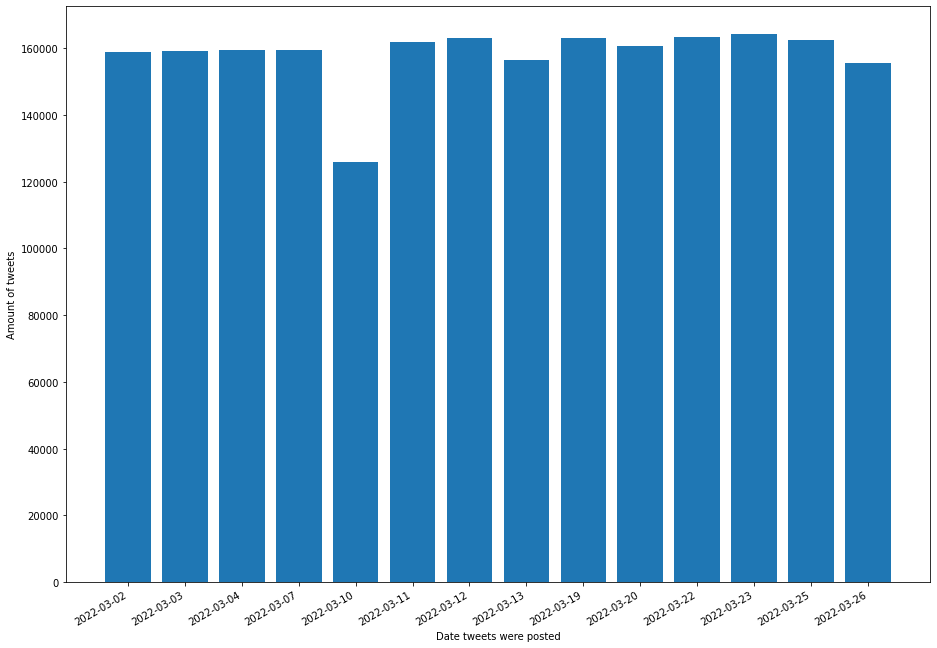

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0,0,1,1])
y = [i[1] for i in dates_c]
x = [i[0] for i in dates_c]
ax.bar(x,y)

plt.xlabel("Date tweets were posted")
plt.ylabel("Amount of tweets")
plt.xticks(rotation=30, ha='right')
#plt.title(f"Top 15 words among {title} tweets {date}")
    
plt.show()

After all of the tweets were successfully collected I counted their total amount. There were 2,028,368 tweets collected.

### March: Explore users

In [7]:
import pandas as pd

In [3]:
#calculates the number of unique tweeters
path = 'results_03_extended'
users = []
for f in os.listdir(f'{path}'):
    if f.startswith('batch'):
        inF = open(f'{path}/{f}','r')
        data = json.load(inF)
        inF.close()
        for batch in data:
            for user in batch['users']:
                user_id = user['id']
                users.append(user_id)
                
unique_users = set(users)
print(len(unique_users))

2209534


In [ ]:
for_df = []

path = 'results_03_extended'
for f in os.listdir(f'{path}'):
    if f.startswith('batch'):
        inF = open(f'{path}/{f}','r')
        data = json.load(inF)
        inF.close()
        for batch in data:
            for user in batch['users']:
                for_df.append(user)

In [120]:
users_df = pd.DataFrame(for_df)
users_df

,verified,username,name,id,created_at,location,withheld
0,False,UrDSU,Dungey State U,92489760,2009-11-25 09:58:13+00:00,NaN,NaN
1,True,KrolPiotr1,Piotr Król,2778888760,2014-09-21 11:50:30+00:00,NaN,NaN
2,False,austin18x,ᴀᴜꜱᴛɪɴ 🇺🇦,1481357424343011328,2022-01-12 20:08:57+00:00,Ukraine,NaN
3,False,ToryTadcaster,Tadcaster Tory,1441739248005050374,2021-09-25 12:20:18+00:00,North Yorkshire,NaN
4,False,RoughlyNews,RoughlyNews,1494897620417978369,2022-02-19 04:52:29+00:00,NaN,NaN
...,...,...,...,...,...,...,...
2209529,False,MikaelDittmann,Mikael,1497553500041011203,2022-02-26 12:46:07+00:00,NaN,NaN
2209530,False,rudolfgrisen,per hulin,775693880,2012-08-23 10:47:41+00:00,NaN,NaN
2209531,False,cmarslett,🍀 #Unity4J #BDS discord.com/cmarslett#9075,175604092,2010-08-07 02:18:34+00:00,NaN,NaN
2209532,False,Vox_Democracy,Katheryne 🇺🇸 🌊💉💉💉😷,829745252395339776,2017-02-09 17:34:18+00:00,Florida,NaN


In [121]:
users_df.drop(columns=['withheld'], inplace=True)
users_df.drop_duplicates(ignore_index=True, inplace=True)
users_df

,verified,username,name,id,created_at,location
0,False,UrDSU,Dungey State U,92489760,2009-11-25 09:58:13+00:00,NaN
1,True,KrolPiotr1,Piotr Król,2778888760,2014-09-21 11:50:30+00:00,NaN
2,False,austin18x,ᴀᴜꜱᴛɪɴ 🇺🇦,1481357424343011328,2022-01-12 20:08:57+00:00,Ukraine
3,False,ToryTadcaster,Tadcaster Tory,1441739248005050374,2021-09-25 12:20:18+00:00,North Yorkshire
4,False,RoughlyNews,RoughlyNews,1494897620417978369,2022-02-19 04:52:29+00:00,NaN
...,...,...,...,...,...,...
905113,False,IvicaMilenkovi4,Ivica,849884745349689344,2017-04-06 07:21:28+00:00,NaN
905114,False,cruiseHandE,CruiseHandE,3438292283,2015-08-24 18:33:56+00:00,NaN
905115,False,DRSVoR,thedroidurlooking4,911346133,2012-10-28 23:42:13+00:00,NaN
905116,False,MikaelDittmann,Mikael,1497553500041011203,2022-02-26 12:46:07+00:00,NaN


In [56]:
import re
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [61]:
import string
from string import digits

In [87]:
def get_clean_location(loc):
    upd = loc.translate(str.maketrans('', '', string.punctuation)) #remove punctuation
    upd = upd.translate(str.maketrans('', '', string.digits)) #remove digits
    upd = remove_emojis(upd)
    return upd.lower().strip()

In [98]:
def get_country(location):
    if type(location)== str and ',' in location:
        country = location.split(',')[-1].strip()
        country = get_clean_location(country)
        if country.lower() == 'us'or len(country) == 2:
            return 'usa'
        elif location.lower()=='united kingdom' or location.lower()=='uk' or location.lower()=='england' or location.lower()=='london':
            return 'uk'
        else:
            return country.lower()
    else:
        location = get_clean_location(str(location))
        #different USA
        if type(location)== str and (location.lower() == 'united states' or location.lower() == 'united states of america' or location.lower() == 'us' or location.lower() == 'u.s.a' or location.lower()=='california'):
            return 'usa'
        #different UK
        elif type(location)== str and (location.lower()=='united kingdom' or location.lower()=='uk' or location.lower()=='england' or location.lower()=='london'):
            return 'uk'
        elif type(location)== str:
            country = location.strip()
            return country.lower()
        else:
            return 'nan'

In [104]:
places_ukraine = ['україна', 'украина', 'kyiv', 'київ','киев','kiev','львів','lviv','одесса','харьков','дніпро','kharkiv',
                  'запоріжжя','харків','dnipro','одеса','odesa','odessa']
places_us = ['united states', 'u.s.a','texas','new york','ny','nyc','florida','california','america',
            'virginia','georgia','ohio','loc angeles','new york city','colorado','chicago','michigan',
            'oregon','washington dc','arizona','new jersey','illinois','san francisco']

In [105]:
def modify_country(old):
    if old.lower()=='england' or old.lower()=='united kingdom' or old.lower()=='london':
        return 'uk'
    elif old.lower()=='deutschland':
        return 'germany'
    elif old.lower()=='polska':
        return 'poland'
    elif old.lower()=='españa':
        return 'spain'
    elif old.lower() in places_ukraine:
        return 'ukraine'
    elif old.lower() in places_us:
        return 'usa'
    elif old.lower()=='russia' or old.lower()=='moscow' or old.lower()=='россия' or old.lower()=='москва' or old.lower()=='санкт-петербург' or old.lower()=='saint-petersburg':
        return 'russia'
    elif old.lower()=='paris':
        return 'france'
    else:
        return old.lower().strip()
    

In [122]:
users_df['country'] = users_df['location'].apply(lambda x: get_country(x))
users_df['country_mod'] = users_df['country'].apply(lambda x: modify_country(x))

In [123]:
users_df

,verified,username,name,id,created_at,location,country,country_mod
0,False,UrDSU,Dungey State U,92489760,2009-11-25 09:58:13+00:00,NaN,nan,nan
1,True,KrolPiotr1,Piotr Król,2778888760,2014-09-21 11:50:30+00:00,NaN,nan,nan
2,False,austin18x,ᴀᴜꜱᴛɪɴ 🇺🇦,1481357424343011328,2022-01-12 20:08:57+00:00,Ukraine,ukraine,ukraine
3,False,ToryTadcaster,Tadcaster Tory,1441739248005050374,2021-09-25 12:20:18+00:00,North Yorkshire,north yorkshire,north yorkshire
4,False,RoughlyNews,RoughlyNews,1494897620417978369,2022-02-19 04:52:29+00:00,NaN,nan,nan
...,...,...,...,...,...,...,...,...
905113,False,IvicaMilenkovi4,Ivica,849884745349689344,2017-04-06 07:21:28+00:00,NaN,nan,nan
905114,False,cruiseHandE,CruiseHandE,3438292283,2015-08-24 18:33:56+00:00,NaN,nan,nan
905115,False,DRSVoR,thedroidurlooking4,911346133,2012-10-28 23:42:13+00:00,NaN,nan,nan
905116,False,MikaelDittmann,Mikael,1497553500041011203,2022-02-26 12:46:07+00:00,NaN,nan,nan


**Number of tweeters from countries:**  
    364,825 - didn't include location  
    111,792 - USA (there are more)   
    8,184 - Ukraine  
    2,352 - Russia

In [124]:
top25counties = Counter(users_df['country_mod']).most_common(25)
top25counties

[('nan', 364825),
 ('usa', 111792),
 ('uk', 28108),
 ('', 22798),
 ('france', 12501),
 ('india', 11422),
 ('ukraine', 8184),
 ('germany', 8184),
 ('canada', 6328),
 ('spain', 6188),
 ('poland', 4862),
 ('brasil', 3706),
 ('nigeria', 3397),
 ('scotland', 3079),
 ('venezuela', 2992),
 ('ontario', 2888),
 ('south africa', 2750),
 ('ireland', 2654),
 ('australia', 2409),
 ('earth', 2388),
 ('russia', 2352),
 ('türkiye', 2333),
 ('japan', 2199),
 ('argentina', 2179),
 ('pakistan', 1830)]

#### Verified users

In [125]:
verifiedDF = users_df[users_df['verified']==True]

In [126]:
created = [date.split()[0].split('-')[0] for date in list(verifiedDF['created_at'])]
created_d = Counter(created).most_common()
created_d.sort(key = lambda x: x[0])

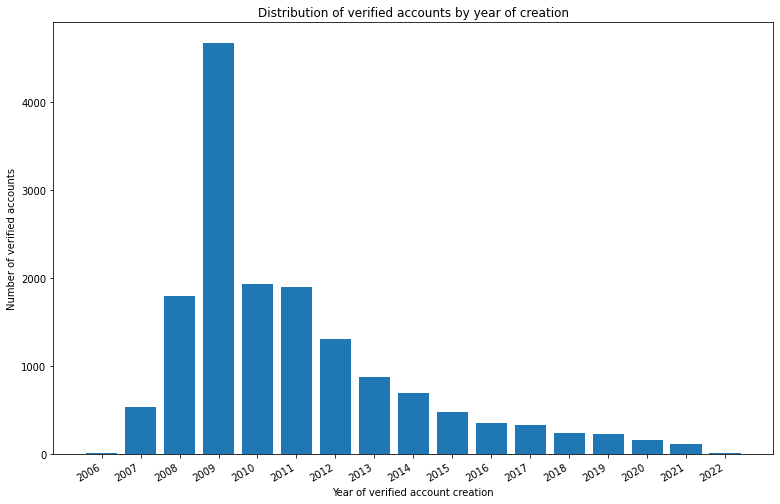

In [127]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])
y = [i[1] for i in created_d]
x = [i[0] for i in created_d]
ax.bar(x,y)

plt.xlabel("Year of verified account creation")
plt.ylabel("Number of verified accounts")
plt.xticks(rotation=30, ha='right')
plt.title("Distribution of verified accounts by year of creation")
    
plt.show()

In [ ]:
verifiedDF['country'] = verifiedDF['location'].apply(lambda x: get_country(x))
verifiedDF['country_mod'] = verifiedDF['country'].apply(lambda x: modify_country(x))

**Number of tweeters from countries:**  
    1,932 - didn't include location  
    4,134 - USA (there are more)   
    159 - Ukraine  
    62 - Russia  
    (15,706 - total)

In [130]:
top25countries = Counter(verifiedDF['country_mod']).most_common(25)
top25countries

[('usa', 4134),
 ('nan', 1932),
 ('uk', 840),
 ('france', 444),
 ('india', 391),
 ('germany', 229),
 ('canada', 171),
 ('ukraine', 159),
 ('', 156),
 ('berlin', 99),
 ('ireland', 95),
 ('spain', 92),
 ('belgium', 87),
 ('ontario', 81),
 ('australia', 78),
 ('brussels', 75),
 ('brasil', 72),
 ('poland', 69),
 ('switzerland', 64),
 ('russia', 62),
 ('scotland', 62),
 ('türkiye', 61),
 ('los angeles', 56),
 ('toronto', 55),
 ('new delhi', 52)]

#### Unverified accounts

In [131]:
unverifiedDF = users_df[users_df['verified']==False]

In [132]:
created = [date.split()[0].split('-')[0] for date in list(unverifiedDF['created_at'])]
created_d = Counter(created).most_common()
created_d.sort(key = lambda x: x[0])

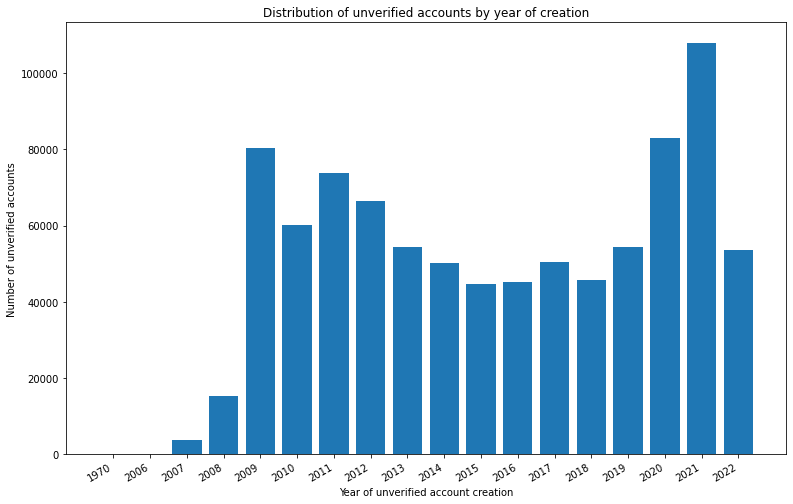

In [133]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])
y = [i[1] for i in created_d]
x = [i[0] for i in created_d]
ax.bar(x,y)

plt.xlabel("Year of unverified account creation")
plt.ylabel("Number of unverified accounts")
plt.xticks(rotation=30, ha='right')
plt.title("Distribution of unverified accounts by year of creation")
    
plt.show()

In [ ]:
unverifiedDF['country'] = unverifiedDF['location'].apply(lambda x: get_country(x))
unverifiedDF['country_mod'] = unverifiedDF['country'].apply(lambda x: modify_country(x))

**Number of tweeters from countries:**  
    362,893 - didn't include location  
    107,658 - USA (there are more)   
    8,025 - Ukraine  
    2,290 - Russia

In [135]:
top25countries = Counter(unverifiedDF['country_mod']).most_common(25)
top25countries

[('nan', 362893),
 ('usa', 107658),
 ('uk', 27268),
 ('', 22642),
 ('france', 12057),
 ('india', 11031),
 ('ukraine', 8025),
 ('germany', 7955),
 ('canada', 6157),
 ('spain', 6096),
 ('poland', 4793),
 ('brasil', 3634),
 ('nigeria', 3352),
 ('scotland', 3017),
 ('venezuela', 2956),
 ('ontario', 2807),
 ('south africa', 2702),
 ('ireland', 2559),
 ('earth', 2376),
 ('australia', 2331),
 ('russia', 2290),
 ('türkiye', 2272),
 ('japan', 2174),
 ('argentina', 2134),
 ('pakistan', 1805)]

In [144]:
unverifiedDF[unverifiedDF['created_at'].str.startswith('2022')]

,verified,username,name,id,created_at,location,country,country_mod
2,False,austin18x,ᴀᴜꜱᴛɪɴ 🇺🇦,1481357424343011328,2022-01-12 20:08:57+00:00,Ukraine,ukraine,ukraine
4,False,RoughlyNews,RoughlyNews,1494897620417978369,2022-02-19 04:52:29+00:00,NaN,nan,nan
10,False,Flavianotavare4,Flaviano Tavares Machado.,1497568161595633665,2022-02-26 13:44:38+00:00,NaN,nan,nan
33,False,AlexandruMuste,Mihai Alex,1487765250569027584,2022-01-30 12:31:16+00:00,Romania,romania,romania
35,False,josephcalogero2,joseph calogero,1499387800726249477,2022-03-03 14:14:56+00:00,NaN,nan,nan
...,...,...,...,...,...,...,...,...
905062,False,NATruckers,Termite and Boo,1492355714030919682,2022-02-12 04:32:11+00:00,Here with you,here with you,here with you
905079,False,atygayeff,Alt True Ist,1488911525117054980,2022-02-02 16:26:15+00:00,NaN,nan,nan
905086,False,wgkohler,William Kohler,1485785061295202307,2022-01-25 01:22:25+00:00,NaN,nan,nan
905107,False,duPolichinelle,Polichinelle,1504990966587002883,2022-03-19 01:19:53+00:00,NaN,nan,nan


### March: Most retweeted tweets

#### What are some of the most retweeted tweets?

In [20]:
numberOfRetweets = []
for f in os.listdir(f'{path}'):
    if f.startswith('batch'):
        inF = open(f'{path}/{f}','r')
        data = json.load(inF)
        inF.close()
        for batch in data:
            for tweet in batch['tweets']:
                if tweet['isRetweet'] == False:
                    retweet_count = tweet['public_metrics']['retweet_count']
                    numberOfRetweets.append((tweet['id'], retweet_count))

In [21]:
numberOfRetweets.sort(key = lambda x: x[1], reverse=True)
print(numberOfRetweets[:10])
topRetweets = [i[0] for i in numberOfRetweets[:10]]

for f in os.listdir(f'{path}'):
    if f.startswith('batch'):
        inF = open(f'{path}/{f}','r')
        data = json.load(inF)
        inF.close()
        for batch in data:
            for tweet in batch['tweets']:
                if tweet['id'] in topRetweets:
                    print(tweet)

[(1500824437947518977, 77373), (1499226199792443397, 49505), (1506639992235433987, 42621), (1499230054781489152, 28153), (1505217044693856258, 23938), (1507865397088948228, 21029), (1499546308176408578, 16934), (1502397889833746433, 16050), (1499548007443968009, 15324), (1506644414201884675, 12753)]
{'author_id': 1373074187179397120, 'public_metrics': {'retweet_count': 28153, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'id': 1499230054781489152, 'text': "@RockWriter2's account is temporarily unavailable because it violates the Twitter Media Policy. Learn more.", 'created_at': '2022-03-03 03:47:54+00:00', 'urls': ['Learn more'], 'isRetweet': False}
{'public_metrics': {'retweet_count': 12753, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'id': 1506644414201884675, 'text': "@Ace3Boom's account is temporarily unavailable because it violates the Twitter Media Policy. Learn more.", 'created_at': '2022-03-23 14:49:55+00:00', 'author_id': 1503477637548707846, 'urls': ['Learn 

### March: Popular Hashtags

In [5]:
import nltk
from nltk.tokenize import TweetTokenizer

In [23]:
hashtags = []
tweet_tokenizer = TweetTokenizer()

for f in os.listdir(f'{path}'):
    if f.startswith('batch'):
        inF = open(f'{path}/{f}','r')
        data = json.load(inF)
        inF.close()
        for batch in data:
            for tweet in batch['tweets']:
                text = tweet['text']
                tokens = tweet_tokenizer.tokenize(text.lower())
                
                for w in tokens:
                    if w.startswith('#'):
                        hashtags.append(w)


print(len(set(hashtags))) #total number of hashtags
hash_c = Counter(hashtags).most_common(20)

61697


In [26]:
hash_c = Counter(hashtags).most_common(25)
popular_hash = [h[0] for h in hash_c]
hash_c

[('#ukraine', 109978),
 ('#russia', 38784),
 ('#putin', 19964),
 ('#standwithukraine', 12586),
 ('#kyiv', 10749),
 ('#russian', 9690),
 ('#ukrainerussiawar', 8468),
 ('#nato', 8146),
 ('#', 8075),
 ('#ukrainian', 7384),
 ('#zelensky', 7032),
 ('#ukraine️', 6277),
 ('#mariupol', 5437),
 ('#ukrainewar', 5426),
 ('#stoprussia', 5102),
 ('#ukrainerussianwar', 5056),
 ('#breaking', 4416),
 ('#ucrania', 4250),
 ('#stopputin', 4111),
 ('#kiev', 3846),
 ('#slavaukraini', 3787),
 ('#russianukrainianwar', 3678),
 ('#ukraineunderattack', 3522),
 ('#kharkiv', 3213),
 ('#russiaukrainewar', 3172)]

### March: Popular Hashtags Network of co-occurence

In [27]:
print(popular_hash)

['#ukraine', '#russia', '#putin', '#standwithukraine', '#kyiv', '#russian', '#ukrainerussiawar', '#nato', '#', '#ukrainian', '#zelensky', '#ukraine️', '#mariupol', '#ukrainewar', '#stoprussia', '#ukrainerussianwar', '#breaking', '#ucrania', '#stopputin', '#kiev', '#slavaukraini', '#russianukrainianwar', '#ukraineunderattack', '#kharkiv', '#russiaukrainewar']


In [28]:
u_hashtags = set(hashtags)
len(u_hashtags)

61697

In [30]:
tweet_hash = {}

for f in os.listdir(f'{path}'):
    inF = open(f'{path}/{f}','r')
    data = json.load(inF)
    inF.close()
    for batch in data:
        for tweet in batch['tweets']:
            text = tweet['text']
            tokens = tweet_tokenizer.tokenize(text.lower())
            tweetHash = []
            for w in tokens:
                if w.startswith('#'):
                    tweetHash.append(w)
                            
        tweet_hash[tweet['id']] = tweetHash

In [31]:
from collections import defaultdict
import numpy as np

In [32]:
popular_hash.remove('#')
matrix = {}

for h in popular_hash:
    matrix[h] = list(np.zeros(len(popular_hash), dtype=int))

In [33]:
for h1 in popular_hash:
    for key in tweet_hash:
        hashs = tweet_hash[key]
        if h1 in hashs:
            for i in range(len(popular_hash)):
                h2 = popular_hash[i]
                if h1 == h2:
                    matrix[h1][i] = 0
                elif h2 in hashs:
                    matrix[h1][i] += 1

In [34]:
print(matrix)

{'#ukraine': [0, 170, 47, 29, 41, 47, 42, 30, 17, 15, 0, 25, 38, 16, 42, 3, 11, 15, 18, 4, 17, 22, 21, 18], '#russia': [170, 0, 39, 3, 14, 20, 18, 13, 13, 3, 6, 8, 9, 2, 7, 4, 5, 2, 8, 0, 9, 4, 9, 12], '#putin': [47, 39, 0, 4, 2, 4, 9, 10, 2, 8, 3, 1, 7, 3, 3, 1, 8, 12, 2, 1, 5, 1, 0, 4], '#standwithukraine': [29, 3, 4, 0, 3, 1, 3, 1, 4, 0, 1, 1, 1, 13, 5, 0, 0, 8, 0, 4, 1, 0, 1, 5], '#kyiv': [41, 14, 2, 3, 0, 11, 2, 1, 5, 3, 3, 4, 4, 0, 2, 4, 4, 3, 13, 0, 4, 1, 9, 1], '#russian': [47, 20, 4, 1, 11, 0, 4, 2, 24, 2, 2, 2, 2, 1, 4, 0, 0, 0, 5, 0, 3, 1, 4, 4], '#ukrainerussiawar': [42, 18, 9, 3, 2, 4, 0, 1, 1, 1, 2, 1, 8, 1, 3, 3, 3, 2, 3, 0, 6, 7, 3, 5], '#nato': [30, 13, 10, 1, 1, 2, 1, 0, 1, 3, 1, 0, 1, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 1], '#ukrainian': [17, 13, 2, 4, 5, 24, 1, 1, 0, 0, 1, 4, 4, 1, 2, 0, 0, 2, 3, 1, 3, 0, 2, 1], '#zelensky': [15, 3, 8, 0, 3, 2, 1, 3, 0, 0, 1, 4, 1, 0, 2, 0, 5, 0, 5, 0, 3, 0, 2, 0], '#ukraine️': [0, 6, 3, 1, 3, 2, 2, 1, 1, 1, 0, 3, 2, 2, 2, 0, 0, 0, 2, 0, 

In [35]:
import matplotlib.pyplot as plt
import networkx as nx
G = nx.Graph()

for h in popular_hash: 
    G.add_nodes_from([(h)])
    
for h in matrix:
    edges = matrix[h]
    for i in range(len(edges)):
        if edges[i] != 0:
            G.add_weighted_edges_from([(h,popular_hash[i],edges[i])])

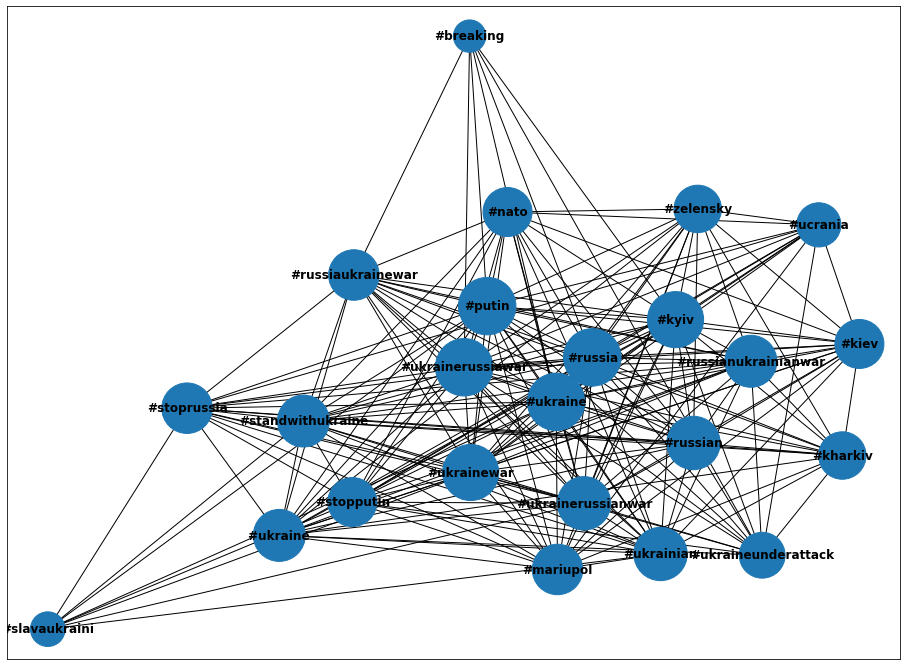

In [39]:
plt.figure(figsize=(16,12))# change size of matlab drawing area

options = {'with_labels': True,
          'font_color': 'black', 'font_weight': 'bold'}

edges = G.edges()
d = dict(G.degree)
#colors = [len(G[u][v]['courses']) for u,v in edges]
#weights = [G[u][v]['weight'] for u,v in edges]

nx.draw_networkx(G,node_size = [v * 150 for v in d.values()], **options)

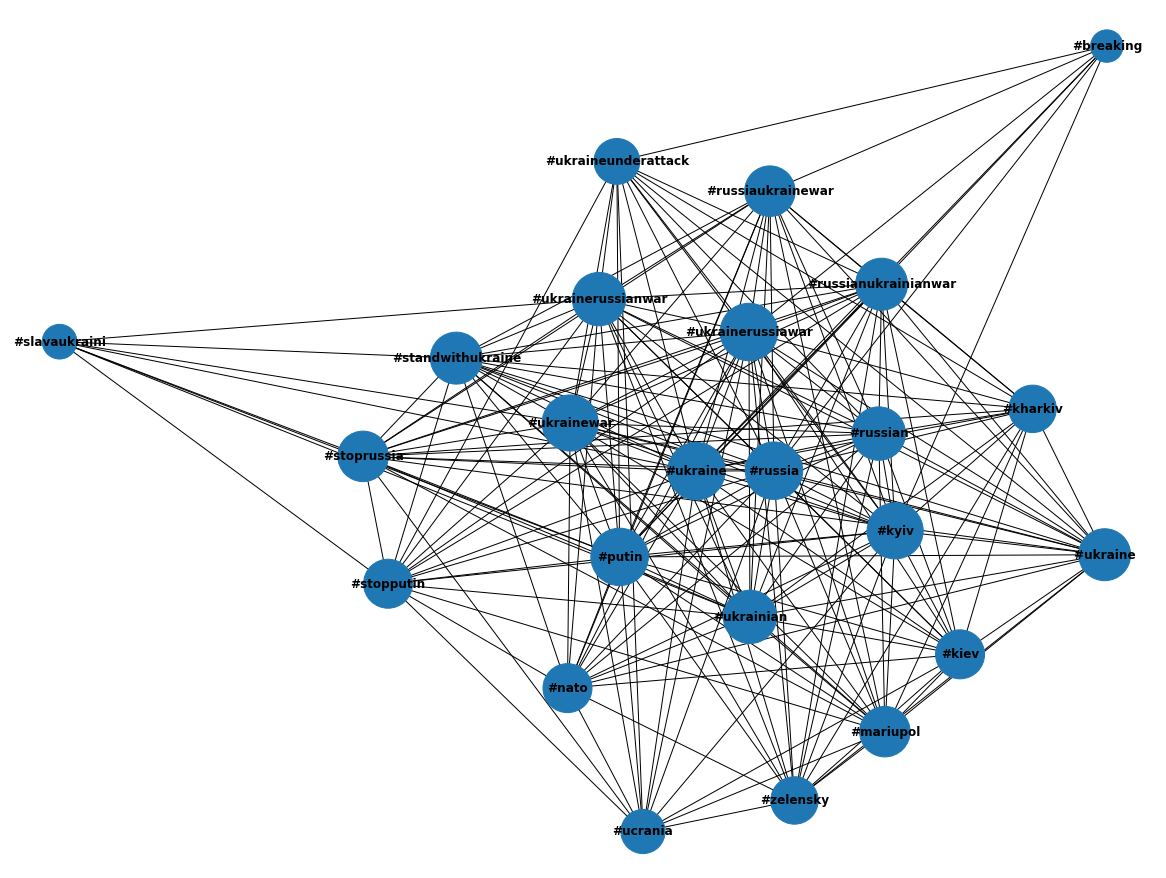

In [40]:
plt.figure(figsize=(16,12))
nx.draw_spring(G, node_size = [v * 150 for v in d.values()],**options)

In [47]:
#where are users of #standwithukraine located?
h1 = '#standwithukraine'
h1_tweets= []

for f in os.listdir(f'{path}'):
    if f.startswith('batch'):
        inF = open(f'{path}/{f}','r')
        data = json.load(inF)
        inF.close()
        for batch in data:
            for tweet in batch['tweets']:
                text = tweet['text']
                tokens = tweet_tokenizer.tokenize(text.lower())
                
                for w in tokens:
                    if w == h1:
                        h1_tweets.append(tweet['id'])

## February 22  

553,055 tweets were collected on February 22nd.

In [147]:
dates = []
for f in os.listdir('results_02'):
    if f.startswith('batch'):
        inF = open(f'results_02/{f}','r')
        data = json.load(inF)
        inF.close()
        for batch in data:
            for tweet in batch['tweets']:
                date = tweet['created_at'].split()[0]
                dates.append(date)
set(dates)

{'2022-02-22'}

In [148]:
len(dates)

553055

### February: Explore Users

In [ ]:
import pandas as pd

In [149]:
#calculates the number of unique tweeters
path = 'results_02'
users = []
for f in os.listdir(f'{path}'):
    if f.startswith('batch'):
        inF = open(f'{path}/{f}','r')
        data = json.load(inF)
        inF.close()
        for batch in data:
            for user in batch['users']:
                user_id = user['id']
                users.append(user_id)
                
unique_users = set(users)
print(len(unique_users))

288805


In [150]:
for_df = []

path = 'results_02'
for f in os.listdir(f'{path}'):
    if f.startswith('batch'):
        inF = open(f'{path}/{f}','r')
        data = json.load(inF)
        inF.close()
        for batch in data:
            for user in batch['users']:
                for_df.append(user)

In [ ]:
users_df = pd.DataFrame(for_df)

In [152]:
users_df.drop(columns=['withheld'], inplace=True)
users_df.drop_duplicates(ignore_index=True, inplace=True)
users_df

,created_at,username,verified,name,id,location
0,2012-06-23 14:58:35+00:00,grey_sister,False,grey-sister,616260000,NaN
1,2011-10-28 20:48:19+00:00,KellyTerresa,False,terresa kelly,400312730,NaN
2,2017-12-28 16:15:02+00:00,framboiseneige,False,framboisedesneiges,946414196832563202,NaN
3,2020-01-22 19:43:49+00:00,wichyciel,False,Bogdan Wichyciel,1220069505759698949,NaN
4,2014-12-04 03:41:20+00:00,JohnJohnomalley,False,John OMalley,2918110374,"Pasadena, CA"
...,...,...,...,...,...,...
288960,2018-02-17 00:37:42+00:00,on_jest,False,On Jest,964660088135921664,NaN
288961,2017-05-15 21:17:40+00:00,AwakeScouser1,False,Viking Scouser🏴󠁧󠁢󠁥󠁮󠁧󠁿🇬🇧🇷🇺🇾🇪,864228311748276230,"Liverpool, England"
288962,2022-02-10 19:19:00+00:00,Joe62979288,False,eric,1491854181631770629,"Indiana, USA"
288963,2015-11-27 00:19:47+00:00,bssr1919,False,BSSR,4290585495,Minsk


In [153]:
users_df['country'] = users_df['location'].apply(lambda x: get_country(x))
users_df['country_mod'] = users_df['country'].apply(lambda x: modify_country(x))

In [154]:
users_df

,created_at,username,verified,name,id,location,country,country_mod
0,2012-06-23 14:58:35+00:00,grey_sister,False,grey-sister,616260000,NaN,nan,nan
1,2011-10-28 20:48:19+00:00,KellyTerresa,False,terresa kelly,400312730,NaN,nan,nan
2,2017-12-28 16:15:02+00:00,framboiseneige,False,framboisedesneiges,946414196832563202,NaN,nan,nan
3,2020-01-22 19:43:49+00:00,wichyciel,False,Bogdan Wichyciel,1220069505759698949,NaN,nan,nan
4,2014-12-04 03:41:20+00:00,JohnJohnomalley,False,John OMalley,2918110374,"Pasadena, CA",usa,usa
...,...,...,...,...,...,...,...,...
288960,2018-02-17 00:37:42+00:00,on_jest,False,On Jest,964660088135921664,NaN,nan,nan
288961,2017-05-15 21:17:40+00:00,AwakeScouser1,False,Viking Scouser🏴󠁧󠁢󠁥󠁮󠁧󠁿🇬🇧🇷🇺🇾🇪,864228311748276230,"Liverpool, England",england,uk
288962,2022-02-10 19:19:00+00:00,Joe62979288,False,eric,1491854181631770629,"Indiana, USA",usa,usa
288963,2015-11-27 00:19:47+00:00,bssr1919,False,BSSR,4290585495,Minsk,minsk,minsk


**Number of tweeters from countries:**  
    110,926 - didn't include location  
    40,800 - USA (there are more)   
    1,383 - Ukraine  
    602 - Russia

In [156]:
top25countries = Counter(users_df['country_mod']).most_common(25)
top25countries

[('nan', 110926),
 ('usa', 40800),
 ('uk', 8979),
 ('', 5172),
 ('india', 4803),
 ('france', 4286),
 ('germany', 3327),
 ('türkiye', 2867),
 ('canada', 1427),
 ('poland', 1386),
 ('ukraine', 1383),
 ('spain', 1189),
 ('kenya', 1067),
 ('brasil', 1037),
 ('scotland', 1006),
 ('pakistan', 948),
 ('nigeria', 946),
 ('earth', 801),
 ('venezuela', 781),
 ('south africa', 720),
 ('australia', 688),
 ('ireland', 654),
 ('ontario', 646),
 ('russia', 602),
 ('argentina', 547)]

**Verified Users**

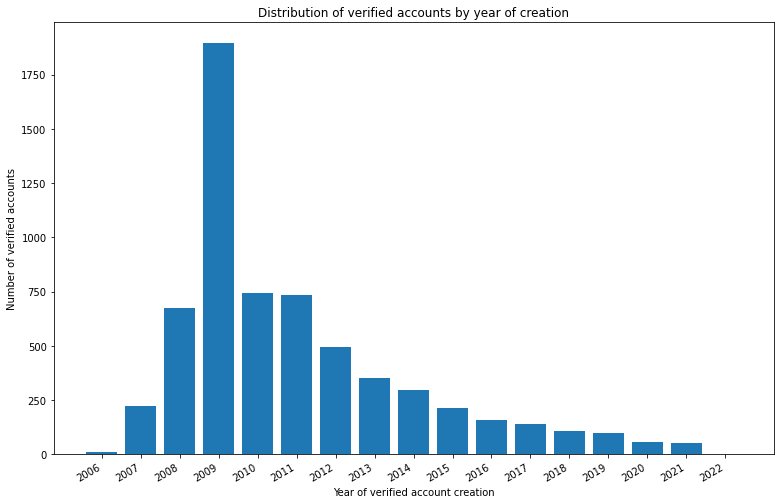

In [157]:
verifiedDF = users_df[users_df['verified']==True]

created = [date.split()[0].split('-')[0] for date in list(verifiedDF['created_at'])]
created_d = Counter(created).most_common()
created_d.sort(key = lambda x: x[0])

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])
y = [i[1] for i in created_d]
x = [i[0] for i in created_d]
ax.bar(x,y)

plt.xlabel("Year of verified account creation")
plt.ylabel("Number of verified accounts")
plt.xticks(rotation=30, ha='right')
plt.title("Distribution of verified accounts by year of creation")
    
plt.show()

**Number of tweeters from countries:**  
    752 - didn't include location  
    1,494 - USA (there are more)   
    52 - Ukraine  
    25 - Russia  
    (6,257 - total)

In [158]:
top25countries = Counter(verifiedDF['country_mod']).most_common(25)
top25countries

[('usa', 1494),
 ('nan', 752),
 ('uk', 346),
 ('india', 190),
 ('germany', 147),
 ('france', 137),
 ('türkiye', 70),
 ('berlin', 61),
 ('', 54),
 ('ukraine', 52),
 ('belgium', 45),
 ('australia', 44),
 ('canada', 39),
 ('brussels', 36),
 ('brasil', 33),
 ('poland', 31),
 ('spain', 29),
 ('russia', 25),
 ('ireland', 25),
 ('los angeles', 24),
 ('kenya', 23),
 ('pakistan', 23),
 ('europe', 22),
 ('new delhi', 22),
 ('washington', 21)]

**Unverified accounts**

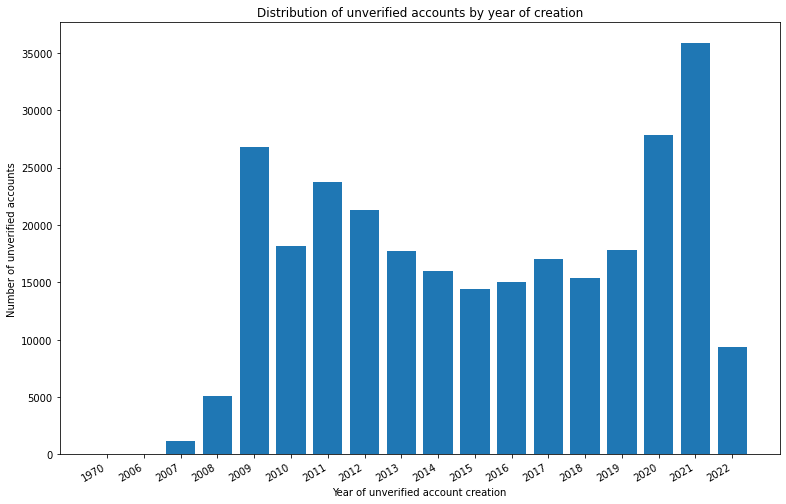

In [160]:
unverifiedDF = users_df[users_df['verified']==False]

created = [date.split()[0].split('-')[0] for date in list(unverifiedDF['created_at'])]
created_d = Counter(created).most_common()
created_d.sort(key = lambda x: x[0])

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])
y = [i[1] for i in created_d]
x = [i[0] for i in created_d]
ax.bar(x,y)

plt.xlabel("Year of unverified account creation")
plt.ylabel("Number of unverified accounts")
plt.xticks(rotation=30, ha='right')
plt.title("Distribution of unverified accounts by year of creation")
    
plt.show()

**Number of tweeters from countries:**  
    110,174 - didn't include location  
    39,306 - USA (there are more)   
    1,331 - Ukraine  
    577 - Russia  
    (282,708 - total)

In [162]:
top25countries = Counter(unverifiedDF['country_mod']).most_common(25)
top25countries

[('nan', 110174),
 ('usa', 39306),
 ('uk', 8633),
 ('', 5118),
 ('india', 4613),
 ('france', 4149),
 ('germany', 3180),
 ('türkiye', 2797),
 ('canada', 1388),
 ('poland', 1355),
 ('ukraine', 1331),
 ('spain', 1160),
 ('kenya', 1044),
 ('brasil', 1004),
 ('scotland', 989),
 ('nigeria', 936),
 ('pakistan', 925),
 ('earth', 798),
 ('venezuela', 767),
 ('south africa', 700),
 ('australia', 644),
 ('ontario', 630),
 ('ireland', 629),
 ('russia', 577),
 ('argentina', 529)]

## February + March Users

In [164]:
files2 = os.listdir('results_02')
files3 = os.listdir('results_03_extended')

users2=[]
users3=[]

for f in files2 + files3:
    if f.startswith('batch_02'):
        inF = open(f'results_02/{f}','r')
        data = json.load(inF)
        inF.close()
        for batch in data:
            for user in batch['users']:
                user_id = user['id']
                users2.append(user_id)
    else:
        inF = open(f'results_03_extended/{f}','r')
        data = json.load(inF)
        inF.close()
        for batch in data:
                for user in batch['users']:
                    user_id = user['id']
                    users3.append(user_id)

In [165]:
len(users2)

551479

In [166]:
len(users3)

2209534

In [167]:
all_users = set(users3).intersection(users2)
len(all_users)

114626

### February: Popular Hashtags

In [56]:
hashtags = []
tweet_tokenizer = TweetTokenizer()

for f in os.listdir('results_02'):
    if f.startswith('batch'):
        inF = open(f'results_02/{f}','r')
        data = json.load(inF)
        inF.close()
        for batch in data:
            for tweet in batch['tweets']:
                text = tweet['text']
                tokens = tweet_tokenizer.tokenize(text.lower())
                
                for w in tokens:
                    if w.startswith('#'):
                        hashtags.append(w)

#dates_c = Counter(dates).most_common(20)
#print(set(hashtags))

In [57]:
len(set(hashtags))

16811

In [63]:
hash_c = Counter(hashtags).most_common(26)
hash_c

[('#ukraine', 25698),
 ('#putin', 9855),
 ('#russia', 8577),
 ('#ukrainerussiacrisis', 2603),
 ('#nato', 2122),
 ('#poutine', 2088),
 ('#donetsk', 2039),
 ('#russiaukrainecrisis', 1682),
 ('#', 1614),
 ('#donbass', 1604),
 ('#biden', 1422),
 ('#breaking', 1332),
 ('#standwithukraine', 1298),
 ('#macron', 1217),
 ('#ukraineconflict', 1190),
 ('#russie', 1143),
 ('#ukrainecrisis', 1114),
 ("#russia's", 1054),
 ('#russiaucraina', 998),
 ('#luhansk', 986),
 ('#russland', 893),
 ('#bitcoin', 888),
 ('#johnsonout29', 861),
 ('#nordstream2', 821),
 ('#usa', 799),
 ('#wwiii', 769)]

In [65]:
popular_hash = [h[0] for h in hash_c]
popular_hash.remove('#')
print(popular_hash)

['#ukraine', '#putin', '#russia', '#ukrainerussiacrisis', '#nato', '#poutine', '#donetsk', '#russiaukrainecrisis', '#donbass', '#biden', '#breaking', '#standwithukraine', '#macron', '#ukraineconflict', '#russie', '#ukrainecrisis', "#russia's", '#russiaucraina', '#luhansk', '#russland', '#bitcoin', '#johnsonout29', '#nordstream2', '#usa', '#wwiii']


In [61]:
unique_hashtags = set(hashtags)

In [62]:
tweet_hash = {}

for f in os.listdir('results_02'):
    inF = open(f'results_02/{f}','r')
    data = json.load(inF)
    inF.close()
    for batch in data:
        for tweet in batch['tweets']:
            text = tweet['text']
            tokens = tweet_tokenizer.tokenize(text.lower())
            tweetHash = []
            for w in tokens:
                if w.startswith('#'):
                    tweetHash.append(w)
                            
        tweet_hash[tweet['id']] = tweetHash

In [67]:
matrix = {}

for h in popular_hash:
    matrix[h] = list(np.zeros(len(popular_hash), dtype=int))

for h1 in popular_hash:
    for key in tweet_hash:
        hashs = tweet_hash[key]
        if h1 in hashs:
            for i in range(len(popular_hash)):
                h2 = popular_hash[i]
                if h1 == h2:
                    matrix[h1][i] = 0
                elif h2 in hashs:
                    matrix[h1][i] += 1

In [68]:
print(matrix)

{'#ukraine': [0, 29, 41, 8, 7, 12, 5, 7, 3, 7, 1, 4, 0, 8, 13, 9, 1, 4, 2, 4, 1, 2, 2, 5, 6], '#putin': [29, 0, 15, 4, 7, 0, 1, 2, 3, 6, 1, 1, 0, 2, 1, 1, 0, 8, 0, 2, 0, 0, 1, 2, 8], '#russia': [41, 15, 0, 3, 6, 0, 3, 5, 2, 0, 1, 1, 0, 0, 0, 2, 1, 1, 2, 0, 0, 0, 1, 3, 6], '#ukrainerussiacrisis': [8, 4, 3, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 3, 1, 4, 1, 1, 0, 0, 0, 0, 0, 0, 0], '#nato': [7, 7, 6, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 2], '#poutine': [12, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 3, 0, 5, 1, 0, 1, 0, 0, 0, 0, 0, 3, 0], '#donetsk': [5, 1, 3, 0, 4, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0], '#russiaukrainecrisis': [7, 2, 5, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 0, 3, 0, 0, 0, 0, 0, 0, 2], '#donbass': [3, 3, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], '#biden': [7, 6, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0], '#breaking': [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

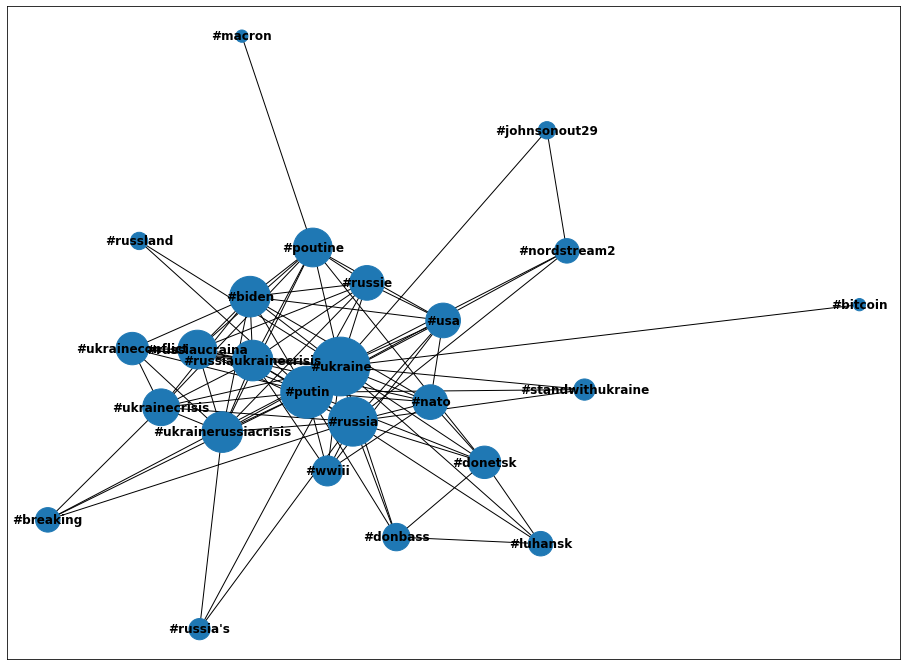

In [69]:
G = nx.Graph()

for h in popular_hash: 
    G.add_nodes_from([(h)])
    
for h in matrix:
    edges = matrix[h]
    for i in range(len(edges)):
        if edges[i] != 0:
            G.add_weighted_edges_from([(h,popular_hash[i],edges[i])])
            
plt.figure(figsize=(16,12))# change size of matlab drawing area

options = {'with_labels': True,
          'font_color': 'black', 'font_weight': 'bold'}

edges = G.edges()
d = dict(G.degree)
#colors = [len(G[u][v]['courses']) for u,v in edges]
#weights = [G[u][v]['weight'] for u,v in edges]

nx.draw_networkx(G,node_size = [v * 150 for v in d.values()], **options)

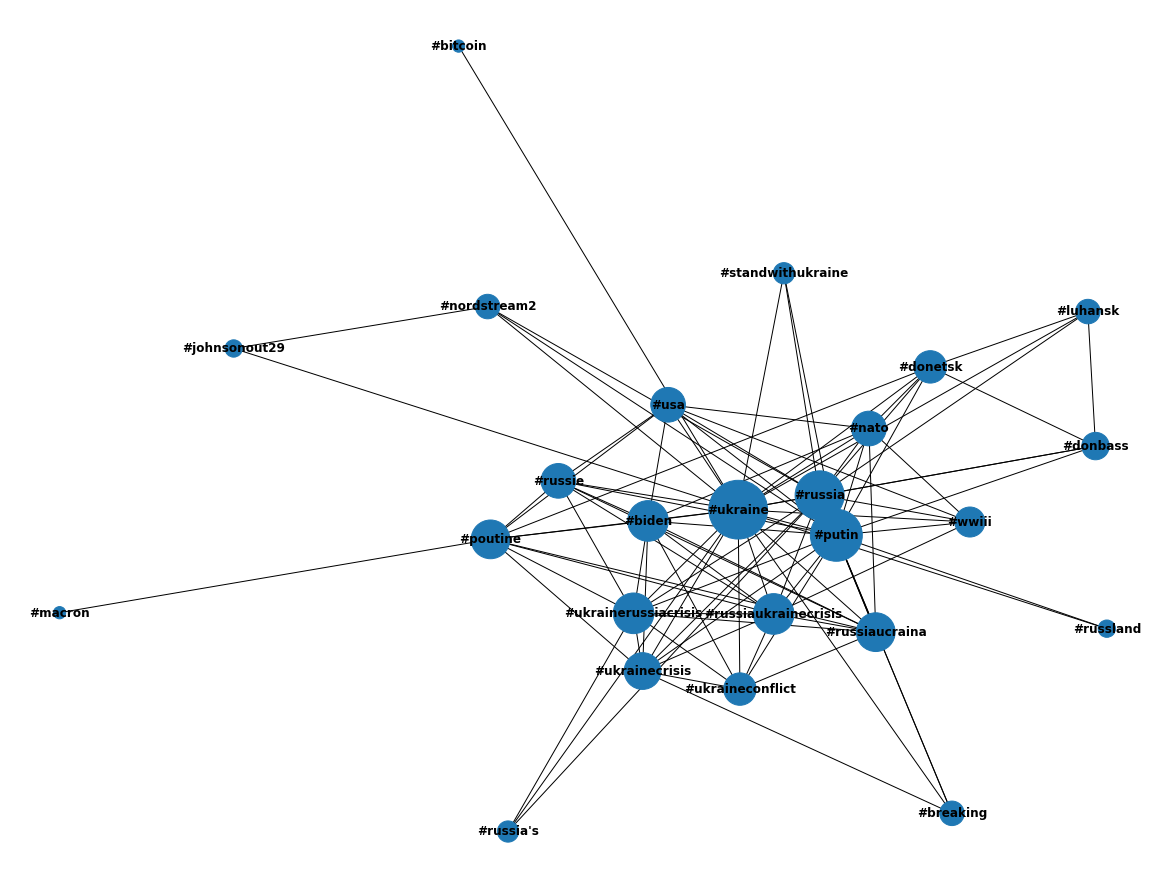

In [70]:
plt.figure(figsize=(16,12))
nx.draw_spring(G, node_size = [v * 150 for v in d.values()],**options)

### Pro-Russia Hashtags

In [89]:
prostate_hashtags = ['#ПрезидентМойДруг', '#ZаРоссию', '#надонбассевойна8лет', '#Zанаших', '#героиZ', '#героиV']
prostate_hashtags = [h.lower() for h in prostate_hashtags]
prostate_hashtags

['#президентмойдруг',
 '#zароссию',
 '#надонбассевойна8лет',
 '#zанаших',
 '#героиz',
 '#героиv']

In [1]:
interesting_words = ['biolabs', 'bio', 'bioweapons', 'biological', 'nuclear', 'nuclear war', 'nuclear weapons',
                    '#fake', 'nazi', 'libarate', 'DNR', 'LNR', '#Donbass', '#Luhansk']

In [7]:
tweet_tokenizer = TweetTokenizer()

In [8]:
prostate_tweets = []

for f in os.listdir('results_03_extended'):
    if f.startswith('batch'):
        inF = open(f'results_03_extended/{f}','r')
        data = json.load(inF)
        inF.close()
        for batch in data:
            for tweet in batch['tweets']:
                text = tweet['text']
                tokens = tweet_tokenizer.tokenize(text)

                for h in interesting_words:
                    if h in tokens:
                        prostate_tweets.append(tweet)

In [9]:
len(prostate_tweets)

50303

In [ ]:
prostate_tweets

In [99]:
len(prostate_tweets)

23769